# Laboratorio 1: Algoritmo de Canny

Se carga la imagen a procesar y se presenta en escala de grises

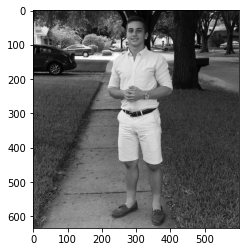

In [9]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Se carga la imagen en escala de grises
img = cv2.imread("Foto.jpg", cv2.IMREAD_GRAYSCALE)

# Se despliega la imagen
plt.imshow(img, cmap="gray")

## Funciones Auxiliares

Se crean las funciones auxiliares que se utilizarán para realizar los primeros cálculos del algoritmo de Canny. Se crean dos funciones de derivadas (una sobre el eje X y otra sobre el eje Y) y luego se utilizan dichas derivadas para calcular la magnitud y la fase de cada pixel.

In [11]:
def derivadaX(img):
    # Se aplica el filtro gaussiano a la imagen
    img = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_WRAP)

    # 1. Se obtiene la primera columna de pixeles de "img"
    # 2. Se redimensiona para que consista de un vector columna
    col0 = np.reshape(img[:,0], (-1, 1))
    
    # Se obtiene la diferencia de pixeles adyacentes sobre el eje X
    diff = np.diff(img, axis = 1)

    # Se coloca la matriz de diferencias a la derecha de la "columna 0" 
    diffX = np.hstack((col0, diff))

    return np.gradient(img, axis=1)

def derivadaY(img):
    # Se aplica el filtro gaussiano a la imagen
    img = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_WRAP)

    # 1. Se obtiene la primera fila de pixeles de "img"
    # 2. Se redimensiona para que consista de un vector columna
    fil0 = np.reshape(img[0,:], (1, -1))
    
    # Se obtiene la diferencia de pixeles adyacentes sobre el eje X
    diff = np.diff(img, axis = 0)

    # Se coloca la matriz de diferencias a la derecha de la "columna 0" 
    diffY = np.vstack((fil0, diff))

    return np.gradient(img, axis=0)

def magnitud(dx, dy):
    return np.sqrt(dx**2 + dy**2)

def fase(dx, dy):
    return (180/np.pi) * np.arctan2(dy, dx)

Luego de las funciones anteriores se declara la función para eliminar "máximos locales" de los bordes, utilizando la magnitud y la fase, también conocido como "Non-Maximum Suppresion".

In [5]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]
    
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]
            
            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2 
                #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                #newImg[i, j] = 255
            else:
                newImg[i, j] = 0     
    return newImg

Función para realizar thresholding bidimensional para cada pixel en la imagen procesada utilizando non-maximal suppresion. 

In [6]:
def threshold(img):
    alto = img.shape[0]
    ancho = img.shape[1]

    newImg = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            if (img[i,j] > 12):
                newImg[i,j] = 255
            else:
                newImg[i,j] = 0

    return newImg

## Algoritmo

Se juntan todas las funciones creadas previamente para poder crear una aproximación del algoritmo de Canny

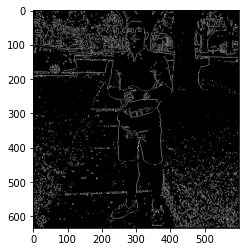

In [14]:
# Se calculan las derivadas
dx = derivadaX(img)
dy = derivadaY(img)

# Se obtiene la magnitud y fase de la imagen
mag = magnitud(dx, dy).astype(int)
fas = fase(dx, dy).astype(int)

# Se suprimen los máximos locales 
nms = non_maximum_suppression(mag, fas)

# Se hace thresholding bidimensional
edges = threshold(nms)

# Se despliega la imagen
plt.imshow(edges, cmap="gray")


## Comparación

Se comparan los resultados obtenidos previamente con los que genera OpenCV utilizando "cv2.Canny"

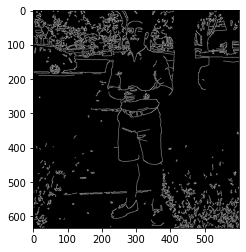

In [66]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap = "gray")